# Playing with isochrones


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
filepath = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/BHAC15_iso.ukidss"

skiprows = 97
end = 127
myr_2 = np.loadtxt(filepath, skiprows=skiprows, max_rows=end-skiprows)

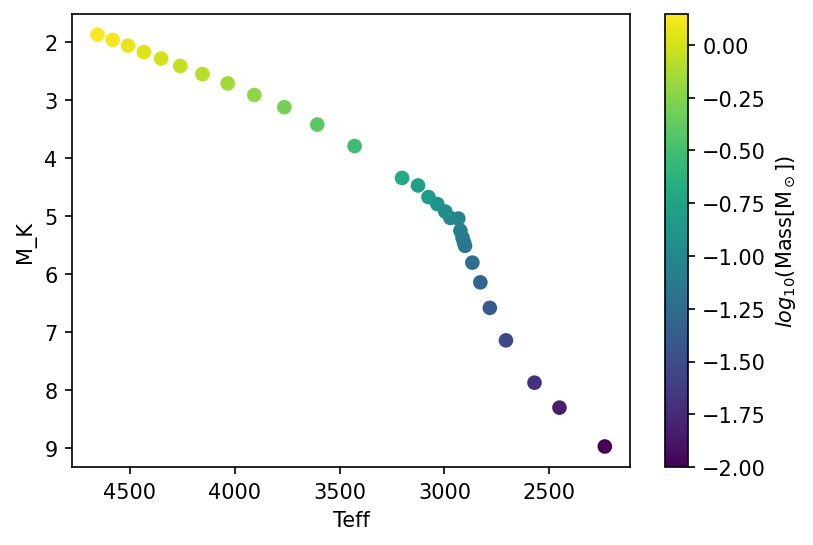

In [26]:

teff = myr_2[:,1]
Mk = myr_2[:, -1]
M = myr_2[:, 0]

plt.figure(dpi=150)

plt.scatter(teff, Mk, c=np.log10(M))
plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.xlabel("Teff")
plt.ylabel("M_K")

ax = plt.gca()
# everything in astronomy is backwards
ax.invert_yaxis()
ax.invert_xaxis()

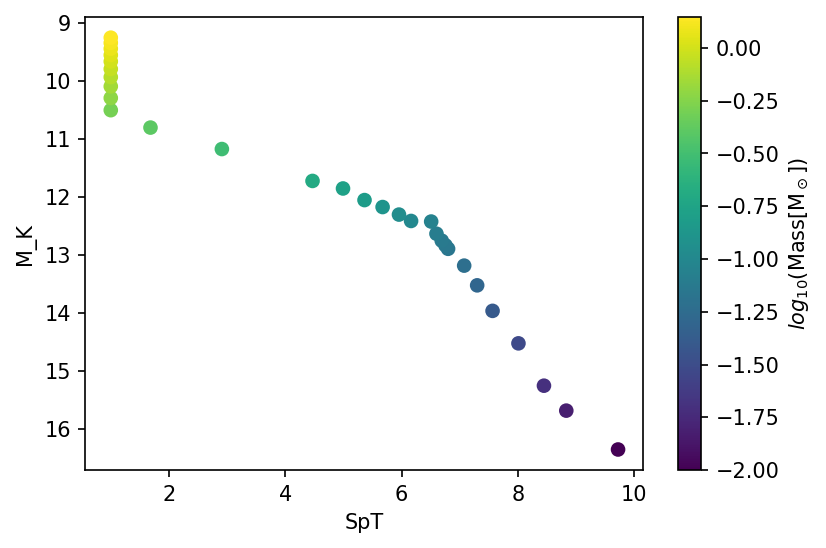

In [27]:
from wuvars.analysis.spectral_type_to_temperature import get_SpT_from_Teff

teff = myr_2[:,1]
SpT = get_SpT_from_Teff(teff)

Mk = myr_2[:, -1]
distmod = 5 * np.log10(300) - 5
observed_K = Mk + distmod

M = myr_2[:, 0]

plt.figure(dpi=150)

plt.scatter(SpT, observed_K, c=np.log10(M))
plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.xlabel("SpT")
plt.ylabel("M_K")

ax = plt.gca()
ax.invert_yaxis()

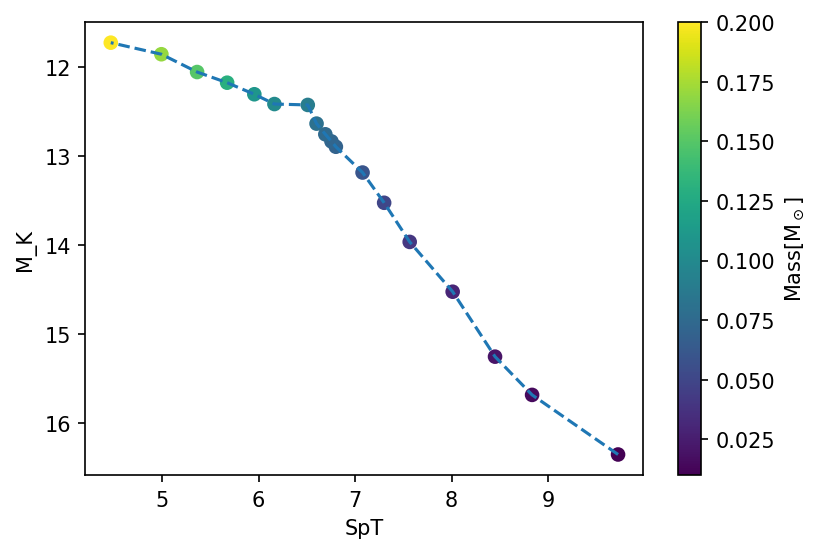

In [35]:
useful_part_of_table = (M <= 0.2)

teff_u = myr_2[:,1][useful_part_of_table]
SpT_u = get_SpT_from_Teff(teff_u)

Mk_u = myr_2[:, -1][useful_part_of_table]
distmod = 5 * np.log10(300) - 5
observed_K_u = Mk_u + distmod

M_u = myr_2[:, 0][useful_part_of_table]

plt.figure(dpi=150)

plt.scatter(SpT_u, observed_K_u, c=M_u)
plt.plot(SpT_u, observed_K_u, '--')
# plt.colorbar(label=r"$log_{10} \left( \rm{Mass} \left[ M_\odot \right] \right)$" )
plt.colorbar(label=r"$\rm{Mass} \left[ M_\odot \right] $" )
plt.xlabel("SpT")
plt.ylabel("M_K")

ax = plt.gca()
ax.invert_yaxis()